In [57]:
import numpy as np
from qiskit import QuantumCircuit

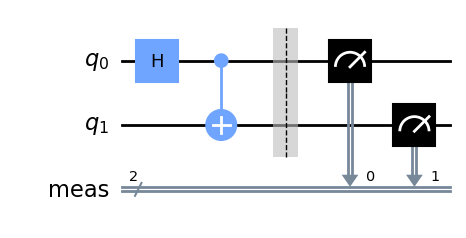

In [58]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(2)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
#circ.h(1)
circ.cx(0, 1)

circ.measure_all()
circ.draw('mpl')

In [59]:
print(circ.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg meas[2];
h q[0];
cx q[0],q[1];
barrier q[0],q[1];
measure q[0] -> meas[0];
measure q[1] -> meas[1];



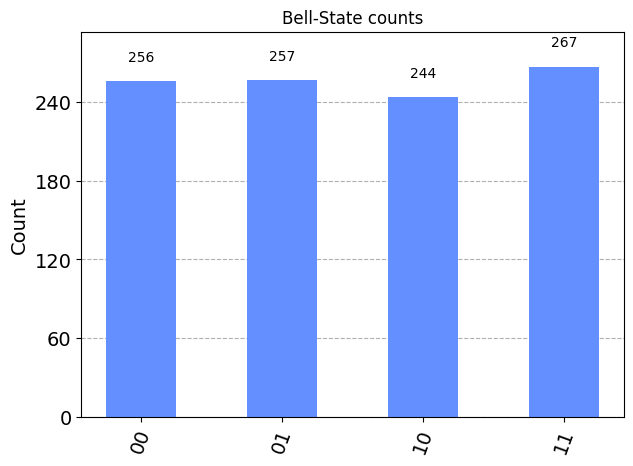

In [56]:
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
simulator = Aer.get_backend('aer_simulator')
transpiled_circ = transpile(circ, simulator)
result = simulator.run(transpiled_circ).result()
counts = result.get_counts(transpiled_circ)
plot_histogram(counts, title='Bell-State counts')